In [99]:
%matplotlib
#%matplotlib inline
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import folium
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify
plt.style.use('ggplot')

color = (65/255,174/255,189/255)
treemap_size = (20,20)
wordcloud_size = (30,15)
barchart_size = (30,15)
fontvalue = 20

Using matplotlib backend: Qt5Agg


In [100]:
"""Merging Data Sets and creating the final DataFrame"""
#importing the CSV cleaned files (Cleaning has been done via seperate code in a seperate jupyter notebook)
Aijobsindustry_dataset = pd.read_csv("AIJobsIndustry_Clean_v3.csv")
print(f"No of rows in Aijobsindustry_dataset is {Aijobsindustry_dataset.shape[0]}")
Dice_us_jobs_dataset = pd.read_csv("Dice_US_jobs_Clean_v4.csv", encoding="cp437")
print(f"No of rows in Dice_us_jobs_dataset is {Dice_us_jobs_dataset.shape[0]}")
monster_dataset = pd.read_csv("Monster_Clean.csv")
print(f"No of rows in monster_dataset is {monster_dataset.shape[0]}")
indeed_dataset = pd.read_csv("alldata_Clean_v3.csv")
print(f"No of rows in indeed_dataset is {indeed_dataset.shape[0]}")
multi_src_dataset = pd.read_csv("cleanedandfilteredUSJobs.csv")
print(f"No of rows in multiple source data set is {multi_src_dataset.shape[0]}")
dice_tech_filtered = pd.read_csv("Dice_US_Tech_FilteredJobData.csv")
print(f"No of rows in dice_tech_filtered is {dice_tech_filtered.shape[0]}")
# Calcualting the total
print(f"No of rows in final merged data set should be {Aijobsindustry_dataset.shape[0]+multi_src_dataset.shape[0]+Dice_us_jobs_dataset.shape[0]+monster_dataset.shape[0]+indeed_dataset.shape[0]+dice_tech_filtered.shape[0]}")
datasets_to_merge = [Aijobsindustry_dataset,Dice_us_jobs_dataset,monster_dataset,indeed_dataset,dice_tech_filtered,multi_src_dataset]

# Concatenating the data sets
merged_dataset = pd.concat(datasets_to_merge, sort=False)
# Printing the actual values in the data set
print(f"Actual no of rows in merged_dataset is {merged_dataset.shape[0]}")
#Exporting the dataset
merged_dataset.to_csv('Merged_Dataset.csv')

No of rows in Aijobsindustry_dataset is 631
No of rows in Dice_us_jobs_dataset is 1265
No of rows in monster_dataset is 162
No of rows in indeed_dataset is 6953
No of rows in multiple source data set is 207
No of rows in dice_tech_filtered is 1566
No of rows in final merged data set should be 10784
Actual no of rows in merged_dataset is 10784


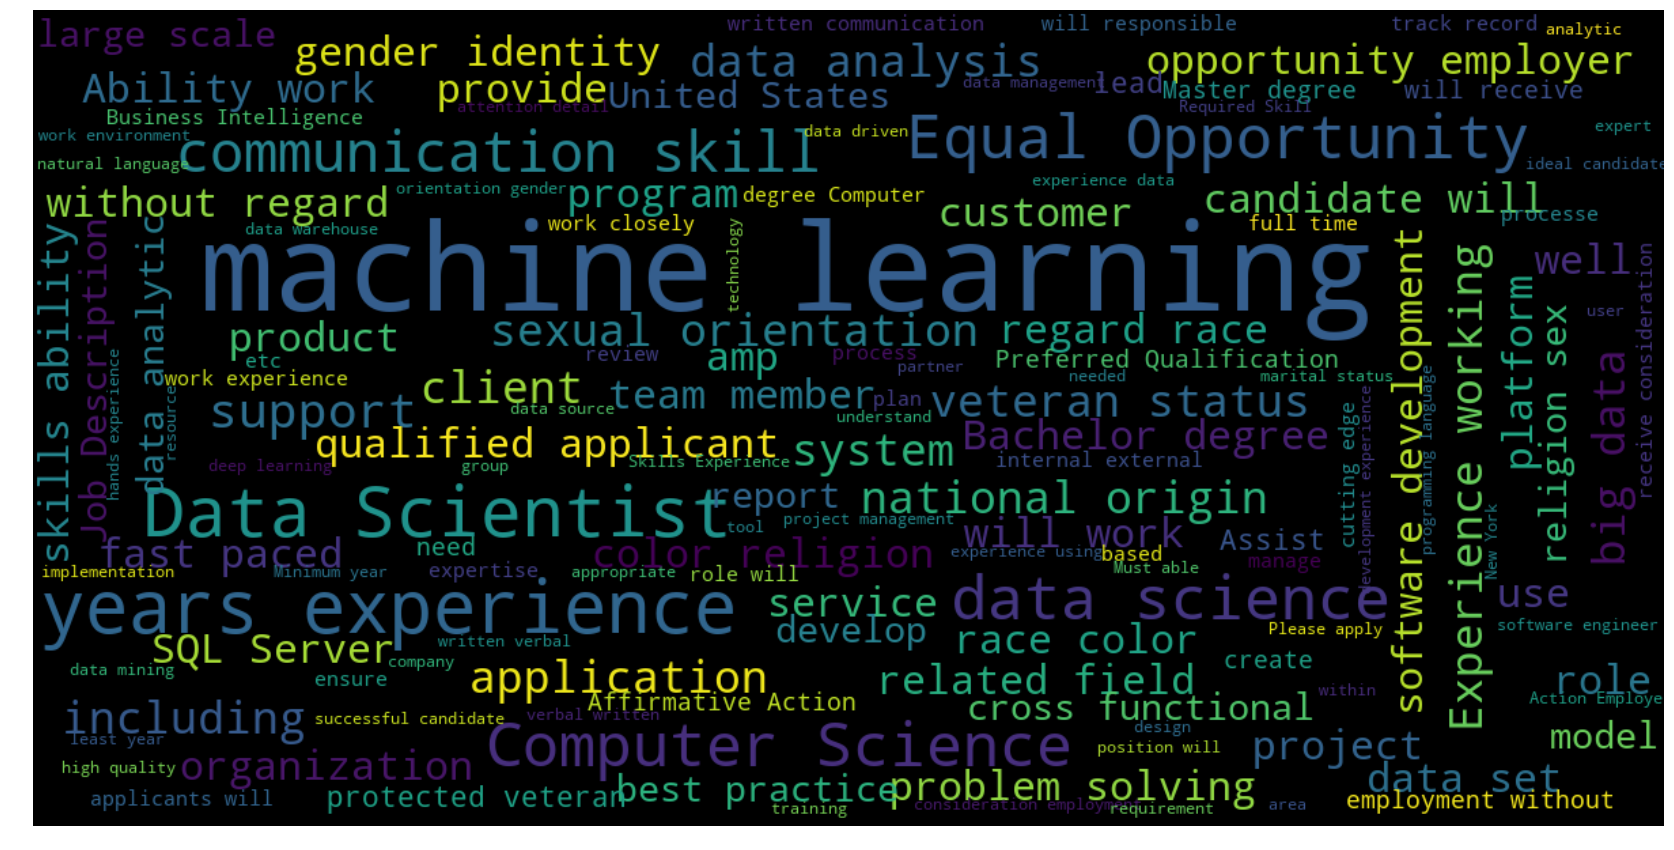

In [101]:
"""Generate a word cloud from description column"""
#create a long string from the description column to feed into wordcloud
desc = merged_dataset['Description']
desc = " ".join((str(x) for x in desc))
#create the wordcloud using the string and add formating for size
wordcloud = WordCloud(scale=3,relative_scaling=1).generate(desc)
plt.figure(figsize=wordcloud_size)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("graphs/DescWordCloud.jpg")
plt.show()

In [102]:
""" Creating an interactive Choropleth Graph to show distribution of jobs across the USA"""
# setting the location of the globe and the zoom value 
map = folium.Map(location=[40, -100], zoom_start=4.3)
# importing a json with state borders
state_geo = os.path.join('us-states.json')
# mapping the choropleth
map.choropleth(geo_data=state_geo,
 name='choropleth',
 data=count_for_state,
 columns=['Loc_state', ''],
 threshold_scale = [0, 25, 150, 600, 1400, 2500],
 key_on='feature.id',
 fill_color='BuPu',
 fill_opacity=0.7,
 line_color = 'blue',
 line_opacity=0.3,
 legend_name='Job distribution across the USA',
 smooth_factor = 1,
 highlight = True)
folium.LayerControl().add_to(map)
map.save('folium_choropleth_USA1.html')
map

In [3]:
desc = merged_dataset['Description']
#print(desc)
group_by_state = merged_dataset.groupby("Loc_state")
count_for_state = group_by_state.count()
count_for_state = count_for_state['Position']
#print(count_for_state)

state_list = os.path.join('states.csv')
state_list_df = pd.read_csv(state_list)
#print(state_list_df.head())
for item in state_list_df['Abbreviation']:
    if item not in count_for_state:
        count_for_state.at[item] = 0
#print(count_for_state)

In [106]:
#grouped by state to create a bar graph and pie chart to get an idea of distribution of the jobs by state
group_by_state = merged_dataset.groupby("Loc_state")
#apply aggrigrate function of count to get number of count per state and remove the extra columns to end up with counters per state
count_for_state = group_by_state.count()
count_for_state = count_for_state["Position"]
count_for_state = count_for_state.to_frame()
count_for_state = count_for_state.reset_index()
#set index of loc state for setting axies for bar and pie
count_for_state = count_for_state.set_index("Loc_state")
print(count_for_state)
#Loop to check against the 50 states of US, and drop non relevant ones
found = []
notfound = []
for item in count_for_state.index.values.tolist():
    try:
        if states[item]:
#             print(f"Found state: {item}")
            found.append(item)
    except:
        notfound.append(item)
        print(f"The {item} is not a US state.")
        count_for_state.drop(item, axis= 0,inplace = True)
        print(f"Dropped column for {item}")
        
print(f"Found: {len(found)} of states")
print(f"Did not find:{notfound}")

           Position
Loc_state          
 AR               2
 AZ              10
 CA             346
 CO              15
 CT              66
 DC              17
 DE               5
 FL              23
 GA             137
 HI               1
 IA               1
 ID               1
 IL              39
 IN               1
 KS               1
 KY               1
 LA               4
 MA             117
 MD              31
 ME               3
 MI               4
 MN              10
 MO               9
 NC              19
 NE               5
 NH               8
 NJ              96
 NV               2
 NY             221
 OH              24
...             ...
LA                5
MA             1428
MD               33
ME                1
MI               58
MN               33
MO               15
NC               72
NE                5
NH               15
NJ              128
NM                3
NV                8
NY             1098
OH               59
OK                3
OR               25


In [8]:
skill_list =['data analysis','machine learning','statistics','computer science','communication','mathematics', 'visualization', 'ai',\
             'deep learning', 'nlp', 'software development','neural networks', 'project management', 'software engineering', \
              'data engineering','bi','modeling','etl','statistical analysis','research','deep learning','interpersonal skills',\
            'web scraping','neural network','decision tree','random forest','testing']
tool_list = ['python','r','sql','hadoop','spark','java','sas','tableau','hive','scala','aws','c++','matlab',\
             'c','excel','nosql','linux','vba','json','numpy','pandas','matplotlib','api','mysql','mongodb','html','css',\
             'java script','ajax','d3','leaflet','matlab']
edu_list = ['bachelor','bachelors','master','masters','phd','post graduation','graduation','high school','bs','ms','ba','ma']
level = ['senior','sr','manager','associate','lead','director','principal','architect','intern','program','assistant','management',\
 'junior','executive','jr','vp','president','chief','vice','mid','entry','student','mgr']

In [9]:
description = merged_dataset['Description']
skills = merged_dataset['Skills']
title = merged_dataset['Position']
desc_skills = description.append(skills)
parse_list = description.append(title)
skill_count = {}
tool_count = {}
edu_count = {}
no_edu_count = 0
for entry in parse_list:
    try:
        entry = re.sub('[./\n\r(),:-]', ' ', str(entry))
#        print(entry)
        entry = re.sub('[^A-Za-z0-9+ ]', '', str(entry)).lower()
        entry = re.sub('data analytics', 'data analysis', str(entry))
        entry = re.sub('artificial intelligence', 'ai', str(entry))
#        print(entry)
        for skill in skill_list:
            if (f' {skill} ' in f' {entry} '):
                if skill not in skill_count:
                    skill_count[skill] = 1
                else:
                    skill_count[skill] += 1
        for tool in tool_list:
            if f' {tool} ' in f' {entry} ':
                if tool not in tool_count:
                    tool_count[tool] = 1
                else:
                    tool_count[tool] += 1   
    except:
        print("Skipping an entry due to bad data")
        continue
description2 = merged_dataset['Description']
for item in description2:
    try:
        item = re.sub('[./\n\r(),:-]', ' ', str(item))
        item = re.sub('[^A-Za-z0-9+ ]', '', str(item)).lower()
        item = re.sub('data analytics', 'data analysis', str(item))
        item = re.sub('artificial intelligence', 'ai', str(item))
        i = 0
        for edu in edu_list:
            if f' {edu} ' in f' {item} ':
                if edu not in edu_count:
                    edu_count[edu] = 1
                else:
                    edu_count[edu] += 1 
            else:
                i +=1
        if i==12: 
            no_edu_count +=1
    except:
        print("Skipping an entry due to bad data")
        continue
print(skill_count)
print(tool_count)
print(edu_count)
education_count = {
    'High School':edu_count['high school'],
    'Bachelors':edu_count['bachelors']+edu_count['bachelor']+edu_count['graduation']+edu_count['bs']++edu_count['ba'],
    'Masters':edu_count['masters']+edu_count['master']+edu_count['post graduation']+edu_count['ms']++edu_count['ma'],
    'Phd':edu_count['phd'],
    'No education mentioned':no_edu_count
}
print(education_count)

{'communication': 4873, 'testing': 2253, 'statistics': 2317, 'mathematics': 1367, 'research': 5532, 'software development': 1339, 'project management': 788, 'modeling': 2226, 'etl': 1314, 'interpersonal skills': 688, 'data analysis': 2469, 'visualization': 1093, 'statistical analysis': 694, 'bi': 966, 'machine learning': 3586, 'computer science': 3207, 'nlp': 402, 'software engineering': 588, 'ai': 1066, 'data engineering': 334, 'deep learning': 1378, 'neural network': 48, 'neural networks': 301, 'web scraping': 14, 'decision tree': 29, 'random forest': 72}
{'sql': 4199, 'sas': 867, 'excel': 1352, 'html': 414, 'css': 372, 'python': 3987, 'linux': 982, 'tableau': 853, 'c': 1321, 'java': 2099, 'api': 451, 'java script': 25, 'json': 184, 'aws': 999, 'spark': 1312, 'mongodb': 286, 'r': 2147, 'hadoop': 1748, 'hive': 808, 'c++': 1166, 'mysql': 540, 'matlab': 1242, 'vba': 152, 'nosql': 629, 'scala': 661, 'ajax': 76, 'd3': 174, 'numpy': 171, 'pandas': 201, 'matplotlib': 50, 'leaflet': 5}
{'ms'

In [10]:
skill_count_df = pd.DataFrame.from_dict(skill_count, orient='index').rename(columns={0:'Skill Count'}).sort_values(by=['Skill Count'], ascending =0)
#print(skill_count_df.head())
plt.figure(figsize=(10,8))
plt.bar(range(len(skill_count_df)), skill_count_df["Skill Count"], color=plt.cm.Paired(np.arange(len(skill_count_df))))
plt.xticks(range(len(skill_count_df)),list(skill_count.keys()),rotation=80)
plt.title('Skill Demand')
plt.xlabel('Skill Name')
plt.ylabel('Skill Count')
plt.tight_layout()
plt.show()

In [11]:
tool_count_df = pd.DataFrame.from_dict(tool_count, orient='index').rename(columns={0:'Tool Count'}).sort_values(by=['Tool Count'], ascending =0)
#print(skill_count_df.head())
plt.figure(figsize=(10,8))
plt.bar(range(len(tool_count_df)), tool_count_df["Tool Count"], color=plt.cm.prism(np.arange(len(tool_count_df))))
plt.xticks(range(len(tool_count_df)),list(tool_count.keys()),rotation=80)
plt.title('Tool Demand')
plt.xlabel('Tool Name')
plt.ylabel('Tool Count')
plt.tight_layout()
plt.show()

In [12]:
education_count_df = pd.DataFrame.from_dict(education_count, orient='index').rename(columns={0:'Education Requirement'})
#print(skill_count_df.head())
#print(education_count_df.head())
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', 'yellow']
explode = (0.05,0.05,0.05,0.05,0.05)
ax = education_count_df.plot(kind='pie',y =['Education Requirement'], autopct='%1.1f%%',startangle=360, shadow=False,\
                        labels=education_count_df.index, colors=colors, explode=explode, pctdistance=0.85,\
                            labeldistance=1.05)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
ax.get_legend().remove()
#plt.legend(loc='best', bbox_to_anchor=(-0.1, 1.),fontsize=8)
plt.tight_layout()
plt.show()

In [13]:
grp_company= merged_dataset.groupby('Company')
grp_compmny_count = pd.DataFrame(grp_company['Position'].count()).sort_values(by=['Position'], ascending=0)
grp_compmny_count_10 =  grp_compmny_count.iloc[0:10,:]
print(grp_compmny_count_10)

                                        Position
Company                                         
Amazon.com                                   452
CyberCoders                                  428
Ball Aerospace                               187
Google                                       154
Microsoft                                    149
NYU Langone Health                            77
KPMG                                          71
Fred Hutchinson Cancer Research Center        70
Apple                                         65
Facebook                                      58


In [14]:
plt.figure(figsize=(11,7))
grp_compmny_count_10_2 = grp_compmny_count_10.reset_index()
y = np.random.uniform(0,35,size=(1, 10))
x = np.random.uniform(0,35,size=(1, 10))
colors=plt.cm.Paired(np.arange(len(grp_compmny_count_10)))
ax = plt.scatter(x=x,y=y,color=colors, \
            s=50*grp_compmny_count_10['Position'],alpha=0.5, label=None)
i=0
for item in grp_compmny_count_10.index:
    plt.scatter([], [], color=colors[i], alpha=0.3, \
                s=grp_compmny_count_10.loc[item,['Position']], label=str(item))
    i+=1
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='', loc='upper right', fontsize='large')
plt.xlim(np.min(x)-5,np.max(x)+15)
plt.ylim(np.min(y)-5,np.max(y)+15)
plt.title("Top 10 companies offering jobs")
plt.tight_layout()
plt.show()

In [15]:
def parser(column):
    word_count = {}
    for entry in column:
        entry = re.sub('[^A-Za-z0-9 ]+', '', str(entry))
#        print(entry)
        try:
            entry = entry.replace(',','')
            entry = re.sub('[^A-Za-z0-9+ ]', '', str(entry)).lower()
            word_split = entry.split()
            for word in word_split:
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
        except AttributeError:
            print("Skipping an entry due to bad data")
            continue
    print(word_count)

In [16]:
from collections import Counter
parse_pos = parser(title)
# #parse_pos
d = Counter(parse_pos)
x = d.most_common()
x

{'data': 3533, 'science': 325, 'development': 341, 'program': 111, 'junior': 67, 'scientist': 3035, 'entrylevel': 8, 'cognitive': 21, 'ai': 90, 'machine': 760, 'learning': 807, 'software': 696, 'developer': 1161, 'phpmysql': 2, 'programmer': 79, 'python': 320, 'job': 159, 'bi': 88, 'analyst': 1483, 'l2': 2, 'jr': 31, 'sql': 596, 'engineer': 1840, 'supply': 36, 'chain': 34, 'scientistanalyst': 1, 'insights': 40, 'advanced': 32, 'needed': 13, 'washington': 8, 'dc': 11, 'business': 386, 'intelligence': 292, 'senior': 1395, 'django': 12, 'web': 89, 'with': 179, 'foodtech': 1, 'startup': 20, 'entry': 19, 'level': 41, 'scientistquantitative': 9, 'engineering': 157, 'university': 21, 'graduate': 11, 'product': 248, 'intern': 111, 'spring': 10, 'director': 276, 'of': 189, 'periscope': 6, 'new': 84, 'ventures': 29, 'summer': 30, '2018': 45, 'big': 195, 'mountain': 6, 'view': 5, 'ca': 34, 'health': 70, 'outcomes': 5, 'spark': 16, 'pythonmachine': 1, 'statistician': 12, 'and': 407, 'analytics': 3

[]

In [39]:
# print(title)
job_type = ['administrator','tester','coordinator','designer','engineer','modeler',\
            'product manager','program manager','project manager','researcher','system analyst','analyst','scientist','developer']
job_level = ['senior','mid-level','junior']
job_type_count = {}
job_level_count = {}
for entry in title:
    try:
        #substituting job_types with meaningful names
        entry = re.sub('[./\n\r(),:-]', ' ', str(entry))
        entry = re.sub('[^A-Za-z0-9+ ]', '', str(entry)).lower()
        entry = re.sub('(admin)', 'administrator', str(entry))
        entry = re.sub('(analysis|analytical|analytics)', 'analyst', str(entry))
        entry = re.sub('(design)', 'designer', str(entry))
        entry = re.sub('(dev|developers|devops|programmer)', 'developer', str(entry))
        entry = re.sub('(engineering|engineerscientist)', 'engineer', str(entry))
        entry = re.sub('(modeler)', 'modeler', str(entry))
#         entry = re.sub('(product)', 'product manager', str(entry))
#         entry = re.sub('(program)', 'program manager', str(entry))
#         entry = re.sub('(project)', 'project manager', str(entry))
        entry = re.sub('(research)', 'researcher', str(entry))
        entry = re.sub('(science|sciences|scientific|scientistengineer)', 'scientist', str(entry))
        entry = re.sub('(system|systems)', 'system analyst', str(entry))
        entry = re.sub('(automation|qa)', 'tester', str(entry))
        #substituting job levels with meaningful names
        entry = re.sub('(associate|intern|assistant|jr|assistant|entry|student)', 'junior', str(entry))
        entry = re.sub('(manager|lead|architect|program|mid|manager|mgr)', 'mid-level', str(entry))
        entry = re.sub('(sr|director|principal|executive|vp|president|chief|vice)', 'senior', str(entry))
        
#         entry = re.sub({'Admin':'administrator',\
#                         'Analysis':'analyst','Analytical':'analyst','Analytics':'analyst',\
#                         'Design':'designer',\
#                         'Dev':'developer','Developers':'developer','DevOps':'developer','Programmer':'developer',\
#                         'Engineering':'engineer','EngineerScientist','engineer',\
#                         'Modeler':'modeling',\
#                         'Product':'Product Manager',\
#                         'Program':'Program Manager',\
#                         'Project':'Project Manager',
#                         'Researcher':'research',
#                         'Science':'scientist','Sciences':'scientist','Scientific':'scientist','ScientistEngineer':'scientist',\
#                         'System':'system analyst','Systems':'system analyst',\
#                         'Automation':'tester','QA':'tester'\}
#                        , str(entry))
        for type in job_type:
            if (f' {type} ' in f' {entry} '):
                if type not in job_type_count:
                    job_type_count[type] = 1
                else:
                    job_type_count[type] += 1
        for level in job_level:
            if f' {level} ' in f' {entry} ':
                if level not in job_level_count:
                    job_level_count[level] = 1
                else:
                    job_level_count[level] += 1   
    except:
        print("Skipping an entry due to bad data")
        continue
print(job_type_count)
print(job_level_count)

{'scientist': 3436, 'developer': 115, 'analyst': 2002, 'engineer': 2071, 'modeler': 22, 'researcher': 1133, 'tester': 108, 'designer': 40, 'administrator': 27, 'system analyst': 54, 'coordinator': 59}
{'mid-level': 1267, 'junior': 873, 'senior': 2662}


In [45]:
# print(title)
job_type = ['administrator','tester','coordinator','designer','engineer','modeler',\
            'product manager','program manager','project manager','researcher','system analyst','analyst','scientist','developer']
job_level = ['senior','mid-level','junior']
job_type_count = {}
job_level_count = {}
for entry in title:
    try:
        #substituting job_types with meaningful names
        entry = re.sub('[./\n\r(),:-]', ' ', str(entry))
        entry = re.sub('[^A-Za-z0-9+ ]', '', str(entry)).lower()
        entry = re.sub('(admin)', 'administrator', str(entry))
        entry = re.sub('(analysis|analytical|analytics)', 'analyst', str(entry))
        entry = re.sub('(design)', 'designer', str(entry))
        entry = re.sub('(dev|developers|devops|programmer)', 'developer', str(entry))
        entry = re.sub('(engineering|engineerscientist)', 'engineer', str(entry))
        entry = re.sub('(modeler)', 'modeler', str(entry))
#         entry = re.sub('(product)', 'product manager', str(entry))
#         entry = re.sub('(program)', 'program manager', str(entry))
#         entry = re.sub('(project)', 'project manager', str(entry))
        entry = re.sub('(research)', 'researcher', str(entry))
        entry = re.sub('(science|sciences|scientific|scientistengineer)', 'scientist', str(entry))
        entry = re.sub('(system|systems)', 'system analyst', str(entry))
        entry = re.sub('(automation|qa)', 'tester', str(entry))
        #substituting job levels with meaningful names
        entry = re.sub('(associate|intern|assistant|jr|assistant|entry|student)', 'junior', str(entry))
        entry = re.sub('(manager|lead|architect|program|mid|manager|mgr)', 'mid-level', str(entry))
        entry = re.sub('(sr|director|principal|executive|vp|president|chief|vice)', 'senior', str(entry))
        for type in job_type:
            if (f' {type} ' in f' {entry} '):
                if type not in job_type_count:
                    job_type_count[type] = 1
                else:
                    job_type_count[type] += 1
                for level in job_level:
                    if f' {level} ' in f' {entry} ':
                        job_type_level = type+'_'+level
                        if job_type_level not in job_level_count:
                            job_level_count[job_type_level] = 1
                        else:
                            job_level_count[job_type_level] += 1   
    except:
        print("Skipping an entry due to bad data")
        continue
print(job_type_count)
print(job_level_count)

{'scientist': 3436, 'developer': 115, 'analyst': 2002, 'engineer': 2071, 'modeler': 22, 'researcher': 1133, 'tester': 108, 'designer': 40, 'administrator': 27, 'system analyst': 54, 'coordinator': 59}
{'scientist_mid-level': 240, 'scientist_junior': 340, 'analyst_senior': 393, 'engineer_junior': 74, 'engineer_senior': 585, 'scientist_senior': 1008, 'analyst_junior': 99, 'modeler_junior': 1, 'researcher_junior': 243, 'developer_junior': 4, 'analyst_mid-level': 130, 'engineer_mid-level': 127, 'system analyst_mid-level': 2, 'tester_mid-level': 7, 'administrator_senior': 3, 'developer_senior': 43, 'researcher_senior': 213, 'researcher_mid-level': 55, 'designer_senior': 13, 'system analyst_senior': 11, 'developer_mid-level': 8, 'designer_junior': 2, 'coordinator_mid-level': 3, 'coordinator_senior': 3, 'designer_mid-level': 4, 'coordinator_junior': 5, 'tester_senior': 12, 'tester_junior': 3, 'modeler_senior': 1, 'modeler_mid-level': 1, 'administrator_mid-level': 1}


In [66]:
job_type_df = pd.DataFrame.from_dict(job_type)
job_type_df

,0
0,administrator
1,tester
2,coordinator
3,designer
4,engineer
5,modeler
6,product manager
7,program manager
8,project manager
9,researcher


In [67]:
jb_level_df = pd.DataFrame.from_dict(job_level)
jb_level_df

,0
0,senior
1,mid-level
2,junior


In [87]:
job_type_level_df = pd.concat([job_type_df,jb_level_df], axis=1, ignore_index=False)
job_type_level_df

,0,0
0,administrator,senior
1,tester,mid-level
2,coordinator,junior
3,designer,NaN
4,engineer,NaN
5,modeler,NaN
6,product manager,NaN
7,program manager,NaN
8,project manager,NaN
9,researcher,NaN
